# Lecture 2: Linear Regression

In this chapter, we introduce the following topics:
- linear regression model
- polynomial regression model
- regualarization 

To solve linear model, there are two approaches:
- normal equation
- gradient descent

## 1. Normal Equation

### 1.1 Univariate Linear Regression with One Parameter

First, we fix $\theta_0$ = 0. 

So the linear model is: $h_\theta(x) = \theta_1x$

We want to use normal equation to find out the value for $\theta_1$ to minimize the cost function.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
X_3 = np.array([[1,1],[1,2], [1,3]])
print(X_3)

[[1 1]
 [1 2]
 [1 3]]


In [10]:
# compute X transpose
X_3_T = np.transpose(X_3)
print(X_3_T)

[[1 1 1]
 [1 2 3]]


In [11]:
y_3 = np.array([1,2,3])
print(y_3)

[1 2 3]


In [12]:
# compute dot product of X transpose and X
X_T_dot_X = np.dot(X_3_T, X_3)
print(X_T_dot_X)

[[ 3  6]
 [ 6 14]]


In [13]:
# compute the inverse of the dot production
inv_dot = np.linalg.inv(X_T_dot_X)
print(inv_dot)

[[ 2.33333333 -1.        ]
 [-1.          0.5       ]]


In [14]:
# compute the dot product of X transpose and y
X_T_doy_y = np.dot(X_3_T, y_3)

In [15]:
# compute the final dot product
theta = np.dot(inv_dot, X_T_doy_y)
print(theta)

[0. 1.]


### 1.2 Univariate Linear Regression with two parameters

#### step 1. fake data

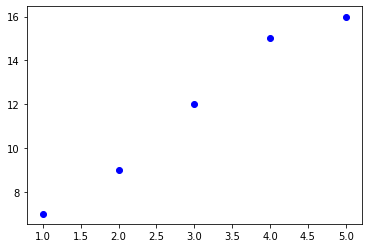

In [16]:
x_5 =  np.array([1,2,3,4,5]) 
y_5 =  np.array([7,9,12,15,16])   
plt.scatter(x_5, y_5, color='blue')
plt.show()

#### 2. compute $\theta$ using normal equation

In [17]:
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [18]:
x_5_bias = np.ones((5,1))
x_5_col = np.reshape(x_5,(5,1)) # column vector
x_5_b = np.append(x_5_bias, x_5_col, axis=1)

In [19]:
theta_5 = normal_equation(x_5_b, y_5)
print(theta_5)

[4.6 2.4]


#### 3. visualizing results

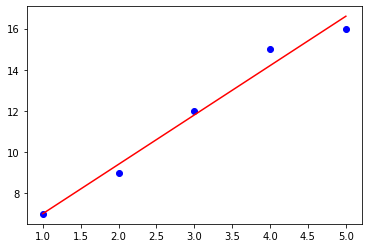

In [20]:
# x =  np.array([1,2,3,4,5]) 
# y =  np.array([7,9,12,15,16])
plt.scatter(x_5, y_5, color='blue')
y_5_hat = theta_5[0] + theta_5[1]*x_5            
plt.plot(x_5, y_5_hat, color='red')
plt.show()

### 3. Bigger examples 

In [21]:
import numpy as np

np.random.seed(42)

X_100 = 2 * np.random.rand(100, 1)
y_100 = 4 + 3 * X_100 + np.random.randn(100, 1)

#### 1. generate data

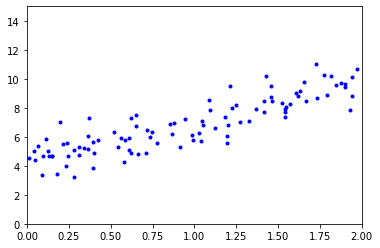

In [22]:
plt.plot(X_100, y_100, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

#### 2. Use normal equation to compute $\theta$

In [23]:
X_100_b = np.c_[np.ones((100, 1)), X_100] # add x0 = 1 to each instance
theta_100 = normal_equation(X_100_b, y_100)  # normal equation
print(theta_100)

[[4.21509616]
 [2.77011339]]


#### 3. visulization

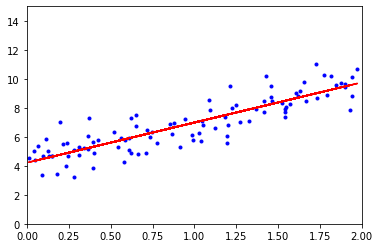

In [24]:
plt.scatter(X_100,y_100,color='blue', marker='.')
y_100_hat = theta_100[0] + theta_100[1]*X_100           
plt.plot(X_100,y_100_hat,color='r')
plt.axis([0, 2, 0, 15])
plt.show()

#### 4. use model to make prediction

In [25]:
# compute two points
X_100_new = np.array([[0], [2]])
X_100_new_b = np.c_[np.ones((2, 1)), X_100_new] # add x0 = 1 to each instance
y_100_predict = X_100_new_b.dot(theta_100)
y_100_predict

array([[4.21509616],
       [9.75532293]])

### 1.4 Implementation using scikit-learn

In [26]:
# from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_100, y_100)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print('intercept', lin_reg.intercept_)
print('coef', lin_reg.coef_)

intercept [4.21509616]
coef [[2.77011339]]


Note that Scikit-Learn separates the bias term (intercept_) from the feature weights (coef_).

In [28]:
lin_reg.score(X_100, y_100)

0.7692735413614223

In [29]:
lin_reg.predict(X_100_new)

array([[4.21509616],
       [9.75532293]])

#### scikit-learn internal implementation under the hood

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”). The least squares solution is computed using the singular value decomposition of X. 

In [30]:
theta_100_svd, residuals, rank, s = np.linalg.lstsq(X_100_b, y_100, rcond=1e-6)

In [31]:
theta_100_svd

array([[4.21509616],
       [2.77011339]])

In [32]:
residuals

array([80.6584564])

In [33]:
rank

2

In fact, this function computes $\hat{\theta} = X^+y$, where $X^+$ isthe pseudo-inverse (also called Moore-Penrose Inverse) of X. 

The pseudoinverse itself is computed using a standard matrix factorization technique called Singular Value Decomposition (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices $U\Sigma V^T$. Then, we have:

$$X^+=V\Sigma^+U^T$$

To compute the matrix $\Sigma^+$, the algorithm takes $\Sigma$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the nonzero values with their inverse, and finally it transposes the resulting matrix.

You can use `np.linalg.pinv()` to compute the pseudo-inverse directly.

In [34]:
np.linalg.pinv(X_100_b).dot(y_100)

array([[4.21509616],
       [2.77011339]])

Normal Equation may not work if the matrix $X^TX$ is not invertible (i.e., singular), such as if m < n or if some features are redundant, but the pseudo-inverse is always defined.

## 2. Gradient Descent

### 2.1 Batch Gradient Descent

In [35]:
lr = 0.1 # learning rate
n_iterations = 1000
m = 100
theta_bgd = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_100_b.T.dot(X_100_b.dot(theta_bgd) - y_100)
    theta_bgd = theta_bgd - lr * gradients

In [36]:
theta_bgd

array([[4.21509616],
       [2.77011339]])

In [37]:
def plot_gradient_descent(theta, lr, theta_path=None):
    m = len(X_100_b)
    plt.plot(X_100, y_100, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_100_predict = X_100_b.dot(theta)
            style = "g-" if iteration > 0 else "r--"  # initial linear model is in red, others are in green
            alpha = 0.1 + iteration / 10  # the transparency increase from oldest one to the latest one
            plt.plot(X_100, y_100_predict, style, alpha=alpha)
        gradients = 2/m * X_100_b.T.dot(X_100_b.dot(theta) - y_100)
        theta = theta - lr * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\alpha = {}$".format(lr), fontsize=16)

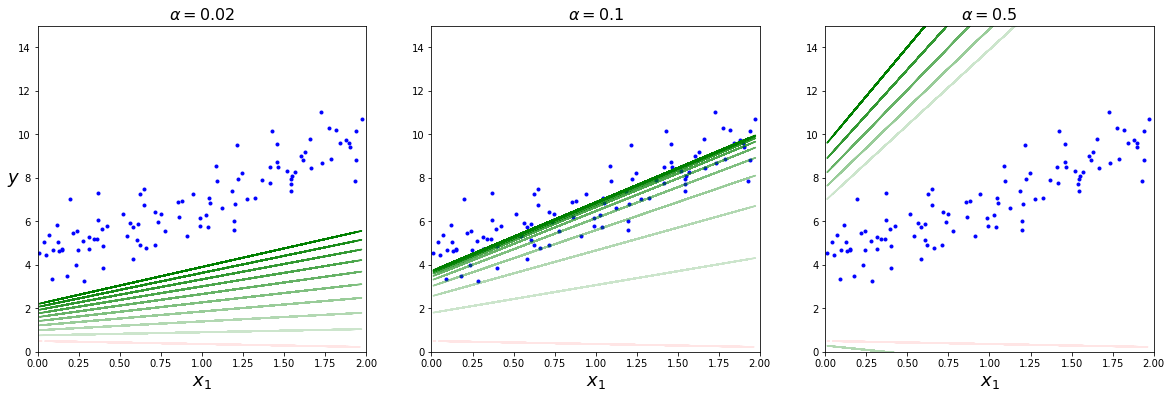

In [38]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

theta_path_bgd = []

plt.figure(figsize=(20,6))

plt.subplot(131); 
plot_gradient_descent(theta, lr=0.02)
# first figure (left-most) needs a y label
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(132); 
plot_gradient_descent(theta, lr=0.1, theta_path=theta_path_bgd)

plt.subplot(133); 
plot_gradient_descent(theta, lr=0.5)

plt.savefig("figures/Learning_rate.png")
plt.show()

### 2.2 Stochastic Gradient Descent

In [39]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_100_b[random_index:random_index+1]
        yi = y_100[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [40]:
theta

array([[4.21076011],
       [2.74856079]])

#### Implementing using Scikit-learn

In [41]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_100, y_100.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [42]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.23868557]), array([2.82181634]))

## 2. Polynomial Regression

### 2.1 生成数据

In [43]:
m = 100
X_poly_100 = 6 * np.random.rand(m, 1) - 3
y_poly_100 = 0.5 * X_poly_100**2 + X_poly_100 + 2 + np.random.randn(m, 1)

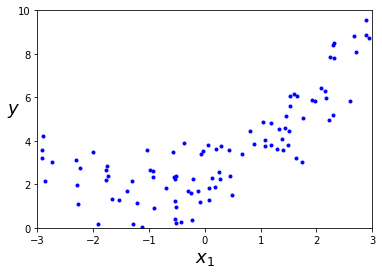

In [44]:
plt.plot(X_poly_100, y_poly_100, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.savefig("figures/quadratic_data_plot")
plt.show()

### 2.2 试用线性回归模型

In [45]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_100, y_poly_100)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
print('intercept', lin_reg_2.intercept_)
print('coef', lin_reg_2.coef_)

intercept [3.37505215]
coef [[1.10510086]]


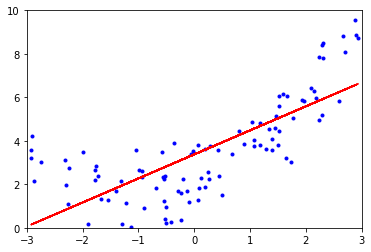

In [47]:
plt.scatter(X_poly_100,y_poly_100,color='blue', marker='.')
y_100_poly_lin_hat = lin_reg_2.intercept_[0] + lin_reg_2.coef_*X_poly_100          
plt.plot(X_poly_100,y_100_poly_lin_hat,color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

In [48]:
lin_reg_2.score(X_poly_100, y_poly_100)

0.5521783421145354

我们可以看出，score 比之前的0.72 要低。

下面，我们用polynomial regression model 来拟合。

首先，对每个feature 构建高阶features。

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_poly_100)


In [50]:
X_poly_100[0]

array([1.97322766])

In [51]:
# X_poly now contains the original feature of X plus the square of this feature.
X_poly[0]

array([1.97322766, 3.89362739])

In [52]:
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly, y_poly_100)
lin_reg_3.intercept_, lin_reg_3.coef_

(array([2.19573036]), array([[1.00978737, 0.4681429 ]]))

我们学习的到的曲线是: $y = 0.523*x^2 + 0,979*x + 2.12$

而我们用于生成的这些数据的函数是：$y = 0.5*x^2 + *x + 2 + 噪音$

所以可以看出结果比较相近。

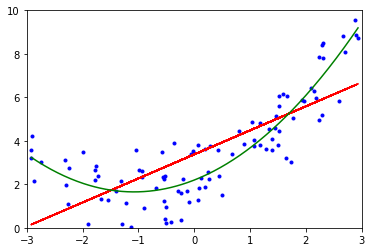

In [53]:
plt.scatter(X_poly_100,y_poly_100,color='blue', marker='.')

y_100_poly_lin_hat = lin_reg_2.intercept_[0] + lin_reg_2.coef_*X_poly_100          
plt.plot(X_poly_100,y_100_poly_lin_hat,color='r')

x_new_300 = np.linspace(X_poly_100.min(), X_poly_100.max(), 300)  
y_300_poly_hat = lin_reg_3.intercept_[0] + lin_reg_3.coef_[0][0]*x_new_300 + lin_reg_3.coef_[0][1]*x_new_300**2
plt.plot(x_new_300,y_300_poly_hat,color='g')

plt.axis([-3, 3, 0, 10])
plt.show()

In [54]:
lin_reg_3.score(X_poly, y_poly_100) # 我们可以看出，score 比linear regression 要好很多

0.814416452940223

degree: 200, score: 0.8910884546064048
degree: 20, score: 0.8366951020947642
degree: 2, score: 0.8144164529402229
degree: 1, score: 0.5521783421145354


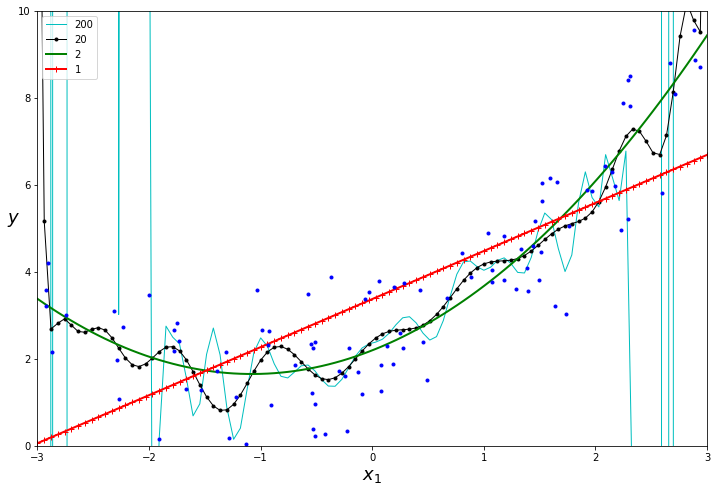

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib.pyplot import figure
from sklearn.preprocessing import PolynomialFeatures

figure(figsize=(12,8))

X_new=np.linspace(-3, 3, 100).reshape(100, 1)

for style, width, degree in (("c-", 1, 200), ("k.-", 1, 20), ("g", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X_poly_100, y_poly_100)
    print('degree: {}, score: {}'.format(degree, polynomial_regression.score(X_poly_100, y_poly_100)))
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X_poly_100, y_poly_100, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.savefig("figures/high_degree_polynomials_plot")
plt.show()

### Learning Curve

我们可以通过learning curve 来判断一个模型是否是overfitting。下面，我们分别打印出linear regression 和polynomial regression 的learning curve。

In [174]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    # shuffle
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

In [171]:
def scatter_plot(x, y):
    plt.plot(x, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.show()

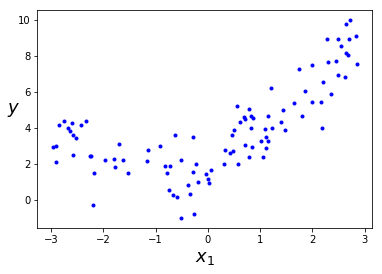

In [172]:
scatter_plot(X_poly_100, y_poly_100)

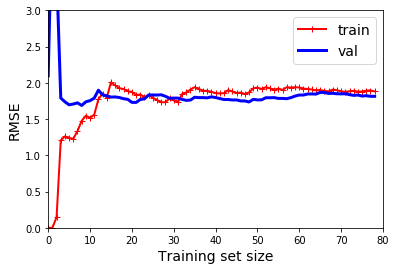

In [188]:
lin_reg0 = LinearRegression()
plot_learning_curves(lin_reg0, X_poly_100, y_poly_100)
plt.axis([0, 80, 0, 3])                         
# plt.savefig("figures/underfitting_learning_curves_plot")   
plt.show() 

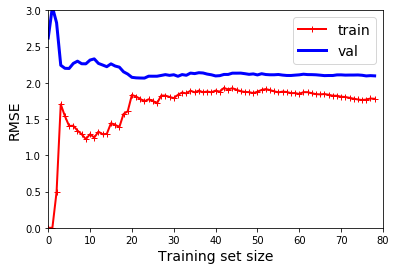

In [186]:
lin_reg0 = LinearRegression()
plot_learning_curves(lin_reg0, X_poly_100, y_poly_100)
plt.axis([0, 80, 0, 3])                         
# plt.savefig("figures/underfitting_learning_curves_plot")   
plt.show() 

- when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero.
- as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly
- model is shown more training examples, it learns, and thus the validation error slowly goes down.

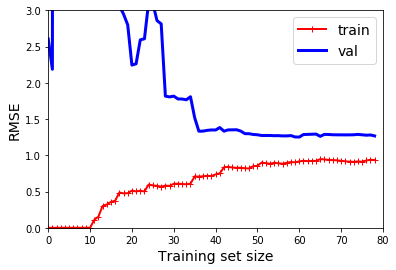

In [194]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
# save_fig("learning_curves_plot")  
plt.show()                        

我们可以看出

1. the error on the training data is much lower than with the Linear Regression model.

2. There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an **overfitting model**.

One solution is to add more data to reduce the overfitting. Anohter solution is regularization. 

### The Bias/Variance Trade-off

Model 的generalization error 主要来源三个方面

- bias: 
    - due to the wrong assumptions, 例如，一个二项式分布的数据我们用linear model 来fit。
    - hight bias = underfitting
- variance
    - due to the sensitivity to small variation in training data
    - high variance = overfitting
- irreducible error
    - due to the noise of data
    - clean up data

#### trade-off
- complex model = high variance and low bias.
- simple model = high bias and low variance.

## 3. Regularization

**idea**: 
- reduce the degree of freedom of a model

**objective**: 
- reduce overfitting

常用方法：
- Ridge
- Lasso
- Elastic Net

### 3.1 Ridge Regression

also called Tikhonov regularization.

在cost function 上加一个正则项: $\alpha \sum_{i=0}^{n}\theta^2$

This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible.
效果等同于: 参数越小越好--> 很多参数趋于0.

The hyperparameter $\alpha$ controls how much you want to regularize the model.

#### 注意
1. 正则项只有在training 过程中才会被加上，在performance evaluation 的时候不使用正则项。

2. 训练和评估选择不同的cost function 是一个常见的情况。
    - 训练的时候的目标是更容易偏微分(training cost function should have optimization-friendly derivatives)，因此只要函数是等价的，那就没有问题。例如求$x^2, logx^2$ 是等价的。
    - 评估的cost function 要更贴近最终的目标（也就是说，要有意义）。as close as possible to the final objective
    
3. Note that the bias term $\theta_0$ is not regularized. 只对特征参数正则化.
4. It is important to scale the data -- This is true of most regularized models.

#### 使用Normal Equation 实现Ridge Regularization

In [243]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X_poly_100, y_poly_100)
ridge_reg.predict([[1.5]])

array([[5.08865964]])

In [244]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X_poly_100, y_poly_100)
ridge_reg.predict([[1.5]])

array([[5.08887201]])

#### 使用SGD 实现Ridge Regularization

In [245]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X_poly_100, y_poly_100.ravel())
sgd_reg.predict([[1.5]])

array([5.08007089])

#### 比较不同的$\alpha$

In [228]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("r-.", "g-+", "k-")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=300, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X_poly_100, y_poly_100)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([-3, 3, 0, 10])

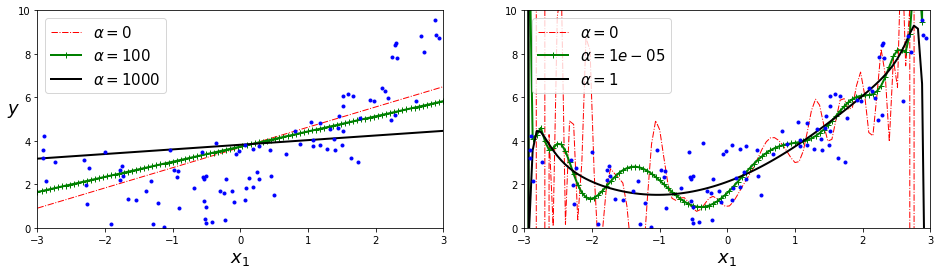

In [242]:
plt.figure(figsize=(16,4))

plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 100, 1000), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.savefig("figures/ridge_regression_plot.png")
plt.show()

从上面的图中可以看出，increasing $\alpha$ leads to flatter (i.e., less extreme, more reasonable) predictions, thus
reducing the model’s variance but increasing its bias.

对于使用normal equation 求解linear regression，公式如下：
$$\hat{\theta} = (X^TX + \alpha A)^{-1}  X^T  y$$

### 3.2 Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression. 在cost function上加入一个$l_1$范式: 

$$J(\theta) = MSE(\theta) + \alpha \sum_{i=0}^{n}|\theta_i|$$

Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.60596839839713, tolerance: 0.0600867100300812
  positive)


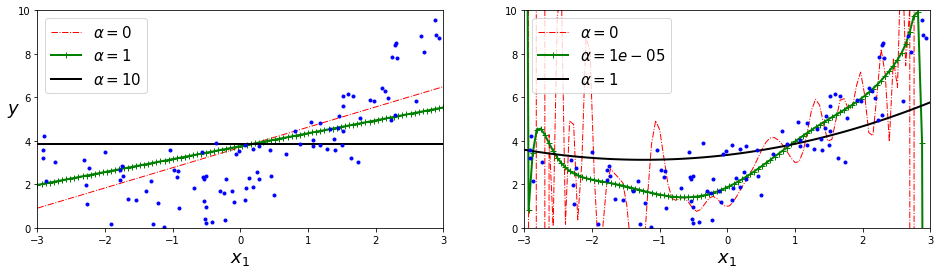

In [253]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(16,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 1, 10), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

# save_fig("lasso_regression_plot")
plt.show()

In [254]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly_100, y_poly_100)
lasso_reg.predict([[1.5]])

array([5.04800771])

#### `np.linspace`

Return evenly spaced numbers over a specified interval.

ref: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

difference between linspace and range (0:0.1:1)
- linspace: 知道个数
- range: 知道步长
除此以外，linspace 通常包含last step

#### `np.meshgrid`

Return coordinate matrices from coordinate vectors. meshgrid is very useful to evaluate functions on a grid.

x 长度n_x, y 长度n_y.

xx, yy = np.meshgrid(x, y) 
- xx, yy 均为n_y 行n_x 列的array
- xx: 每行相同
- yy: 每列相同

例如：x = [0, 0.5, 1], y = [0, 1]

会生成6个点：(0, 0), (0.5, 0),(1, 0), (0, 1), (0.5, 1),  (1, 1)

所以xx 是这六个点的横坐标: [[0, 0.5, 1],[0, 0.5, 1]]
yy 是这六个点的横坐标: [[0, 0, 0],[1, 1, 1]]

ref: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#### `np.ravel()`

Return a contiguous flattened array. 相当于按行展开。
```python
>>> x = np.array([[1, 2, 3], [4, 5, 6]])
>>> np.ravel(x)
array([1, 2, 3, 4, 5, 6])
```

ref: https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

#### `np.c_`

Translates slice objects to concatenation along the second axis.

```python
>>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
array([[1, 4],
       [2, 5],
       [3, 6]])
```

ref: https://numpy.org/doc/stable/reference/generated/numpy.c_.html

In [256]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5  # 坐标轴显示范围

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)

t1, t2 = np.meshgrid(t1s, t2s)

T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

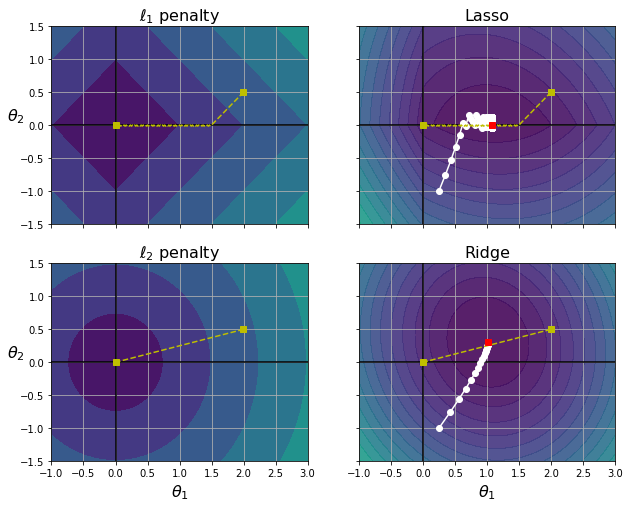

In [257]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

# save_fig("lasso_vs_ridge_plot")
plt.show()

### 3.3. Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression.

$$J(\theta) = MSE(\theta) + r\alpha \sum_{i=0}^{n}|\theta_i| + \frac{1-r}{2}\alpha\sum_{i=0}^{n}\theta^2$$

r: mix ratio
- r=0: equivalent to Ridge Regression
- r=1: equivalent to Lasso Regression

In [261]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_poly_100, y_poly_100)
elastic_net.predict([[1.5]])

array([5.05027672])

#### How to choose regularization method?

- have regularization is always good
- ridge is a good default
- if you suspect that only a few features are useful, try Lasso or Elastic Net.
- generally, Elastic Net is preferred over Lasso
    - Lasso may behave erratically:
        - when the number of features is greater than the number of training instances
        - when several features are strongly correlated

### 3.4 Early Stopping

to stop training as soon as the validation error reaches a minimum.

"beautiful free lunch" - Geoffery Hinton.

In [263]:
from sklearn.base import clone

X_train, X_val, y_train, y_val = train_test_split(X_poly_100, y_poly_100, test_size=0.2, random_state=10)
    
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [264]:
best_epoch

216

## backups

In [192]:
import matplotlib

matplotlib.__version__

'2.1.2'

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

# make data
theta_1 = np.arange(-4, 6, 0.1)
theta_0 = np.arange(-5, 5, 0.1)
theta_1, theta_0 = np.meshgrid(theta_1, theta_0)
loss = (14*theta_1**2 + 3*theta_0**2 + 12*theta_1*theta_0 - 28*theta_1 - 12*theta_0 + 14)/6

# plot surface
alpha = 0.8
surf = ax.plot_surface(theta_1, theta_0, loss, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
X = np.arange(-4, 6, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = (14*X**2 + 3*Y**2 + 12*X*Y - 28*X - 12*Y + 14)/6

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
"""
an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and 
an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis)
"""

ax.view_init(60, 35)
fig.savefig('figures/3d-60-35.png')
fig

In [ ]:
ax.view_init(0, 105)
fig

In [ ]:
ax.view_init(0, 195)
fig

In [ ]:
fig_color = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
ax.view_init(0, 120)
fig_color

#### step 3: plot the result for visualization

In [ ]:
X_housing = np.array([[1, 2140, 5, 1, 45], [1, 1416, 3, 2, 40], [1, 1534, 3, 2, 30], [1, 852, 2, 1, 36]])
y_housing = np.array([460, 232, 315, 178])
y_housing = np.reshape(y_housing,(4,1))

theta = normal_equation_2(X_housing, y_housing)
print(theta)

We can see the problem is the feature scaling.